# Combine features from dframe
Combine features from dframes and plot a scatter matrix

In [56]:
# read features
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [38]:
cpu_df = pd.read_csv("cpu_df.csv",index_col=0)
memory_df = pd.read_csv("memory_df.csv", index_col=0)
network_df = pd.read_csv("network_df.csv", index_col=0)
frames = [cpu_df, memory_df, network_df]
df = pd.concat(frames)  # no jala

[Text(0.5, 1.0, 'Network')]

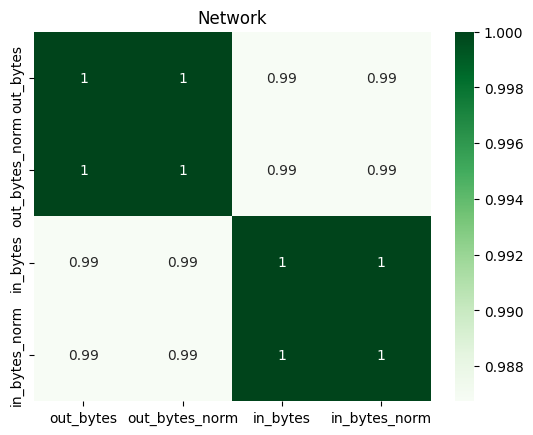

In [73]:
sb.heatmap(network_df.corr(), cmap="Greens", annot=True).set(title='Network')

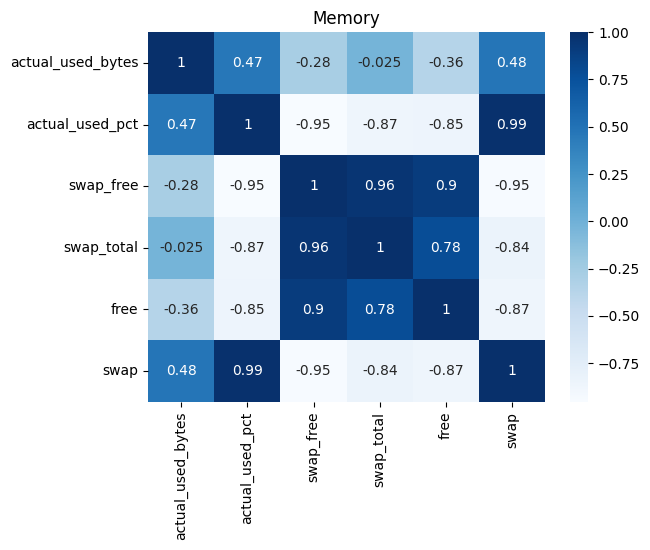

In [72]:
hm = sb.heatmap(memory_df.corr(), cmap="Blues", annot=True).set(title='Memory')

[Text(0.5, 1.0, 'CPU')]

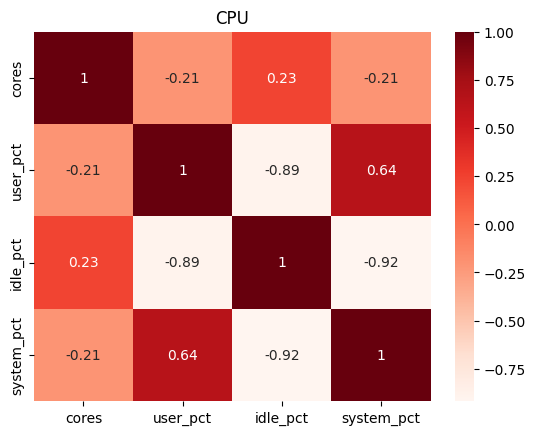

In [74]:
sb.heatmap(cpu_df.corr(), cmap="Reds", annot=True).set(title='CPU')